# Mortgage Risk Analyzer v2

## Intro
This is a simplification of v1.  
This is a non-dimentional alaysis of mortgage expenditure minimization.  
Goal: minimize x  
where x = expenses / housePrice  
and where expenses = payments + interest  

if x = 1.5, that means that you actually pay 1.5 times the house price.

## Fixed Rate Mortgage

In [1]:
import ipywidgets as widgets
input_sliders = []
input_sliders.append(widgets.FloatSlider(value=3,min=1,max=10,step=0.01,description='Intrest Rate (%)',style={'description_width': 'initial'},layout=widgets.Layout(width='100%')))
input_sliders.append(widgets.IntSlider(value=200,min=100,max=1000,description='House Price ($k)',style={'description_width': 'initial'},layout=widgets.Layout(width='100%')))
input_sliders.append(widgets.IntSlider(value=50,min=1,max=100,description='Down Payment ($k)',style={'description_width': 'initial'},layout=widgets.Layout(width='100%')))
input_sliders.append(widgets.IntSlider(value=30,min=1,max=60,description='Term (years)',style={'description_width': 'initial'},layout=widgets.Layout(width='100%')))
input_sliders.append(widgets.FloatSlider(value=1,min=1,max=5,description='Payment Multiplier (%)',style={'description_width': 'initial'},layout=widgets.Layout(width='100%')))
input_sliders.append(widgets.FloatSlider(value=2,min=1,max=5,description='Closing Costs (%)',style={'description_width': 'initial'},layout=widgets.Layout(width='100%')))
input_sliders.append(widgets.IntSlider(value=350,min=300,max=400,description='Appraisal Fee ($)',style={'description_width': 'initial'},layout=widgets.Layout(width='100%')))
input_sliders.append(widgets.IntSlider(value=400,min=300,max=500,description='Inspection Fee ($)',style={'description_width': 'initial'},layout=widgets.Layout(width='100%')))

In [2]:
variables = []
for s in input_sliders:
    smin = int(s.min*100)
    smax = int(s.max*100)
    diff = smax-smin
    points_per_graph = 16
    step = int(diff/points_per_graph)
    variables.append([x / 100 for x in range(smin, smax, step)])

This function calculates x. It goes through each month and calculates the monthly payment amount, & intrest.

In [3]:
def calculateX(intrestRate, housePrice, downPayment, term, minPaymentMuliplyer, closingCostsPrct=0, appraisalFee=0, inspectionFee=0):
    intrestRate = intrestRate/100
    housePrice = housePrice*1000
    downPayment = downPayment*1000
    closingCostsPrct = closingCostsPrct/100
    
    #print('Calculating x for ',intrestRate,' ',housePrice,' ',downPayment,' ',term,' ',minPaymentMuliplyer)
    n = 12*term
    monthlyInterestRate = intrestRate / 12
    #print("monthlyInterestRate =",monthlyInterestRate)
    r = 1/(1+monthlyInterestRate)
    loan = housePrice - downPayment
    #print("loan =",loan)
    closingCosts = closingCostsPrct*loan
    minPayment = loan * ((1-r)/(r-r**(n+1)))
    #print("minpayment =",minPayment)
    payment = minPayment * minPaymentMuliplyer
    #print("payment =",payment)
    paymentSum = 0
    totalmonths = 0
    while loan > 1:
        #print('loan ',loan)
        # 1 month passes
        interest = loan * monthlyInterestRate
        #print('interest ',interest)
        
        p = payment
        #print('payment ',p)
        if interest + loan < payment:
            p = interest + loan
        if p < interest:
            print('error. payment too small')
        
        loan = loan - p + interest
        paymentSum += p
        totalmonths += 1
    expenses = paymentSum + downPayment + closingCosts + appraisalFee + inspectionFee
    x = expenses / housePrice
    return x, totalmonths, minPayment, minPayment * minPaymentMuliplyer
    
        

In [4]:
import matplotlib.pyplot as plt
def mccgraph(x,y,xlabel):
    plt.figure()
    plt.xlabel(xlabel)
    plt.ylabel('x')
    plt.plot(x, y, '-ok')
    plt.show()

In [5]:
def slider_values():
    values = []
    for s in input_sliders:
        values.append(s.value) 
    return values

def show_comparitive_graphs():
    for i,var in enumerate(variables):
        #print(var)
        values = slider_values()
        output = []
        xlabel = ''
        for v in var:
            #print(v)
            values[i] = v
            xlabel = input_sliders[i].description
            x, totalmonths, minPayment, payment = calculateX(values[0],values[1],values[2],values[3],values[4],values[5],values[6],values[7])
            output.append(x)
        mccgraph(var, output, xlabel)

In [6]:
from IPython.display import clear_output
reload_graphs_button = widgets.Button(description="Reload Graphs")
reload_single_option_button = widgets.Button(description="Reload Single Option")
def reload_graphs(change):
    clear_output(wait=True)
    display(reload_graphs_button)
    show_comparitive_graphs()
def reload_single_option_data(change):
    clear_output(wait=True)
    display(reload_single_option_button)
    values = slider_values()
    x, totalmonths, minPayment, payment = calculateX(values[0],values[1],values[2],values[3],values[4],values[5],values[6],values[7])
    print("Minimum monthly payment = $"+str(round(minPayment,2))+" and actual monthly payment = $"+str(round(payment,2)))
    print("You will spend $"+str(int(x*values[1]))+"k on your house in "+str(round(totalmonths/12,2))+" years (x="+str(round(x,2))+")")

Input & Output

In [7]:
for s in input_sliders:
    display(s)

FloatSlider(value=3.0, description='Intrest Rate (%)', layout=Layout(width='100%'), max=10.0, min=1.0, step=0.…

IntSlider(value=200, description='House Price ($k)', layout=Layout(width='100%'), max=1000, min=100, style=Sli…

IntSlider(value=50, description='Down Payment ($k)', layout=Layout(width='100%'), min=1, style=SliderStyle(des…

IntSlider(value=30, description='Term (years)', layout=Layout(width='100%'), max=60, min=1, style=SliderStyle(…

FloatSlider(value=1.0, description='Payment Multiplier (%)', layout=Layout(width='100%'), max=5.0, min=1.0, st…

FloatSlider(value=2.0, description='Closing Costs (%)', layout=Layout(width='100%'), max=5.0, min=1.0, style=S…

IntSlider(value=350, description='Appraisal Fee ($)', layout=Layout(width='100%'), max=400, min=300, style=Sli…

IntSlider(value=400, description='Inspection Fee ($)', layout=Layout(width='100%'), max=500, min=300, style=Sl…

In [8]:
reload_single_option_data(None)
reload_single_option_button.on_click(reload_single_option_data)

Button(description='Reload Single Option', style=ButtonStyle())

Minimum monthly payment = $632.41 and actual monthly payment = $632.41
You will spend $281k on your house in 30.0 years (x=1.41)


Button(description='Reload Graphs', style=ButtonStyle())

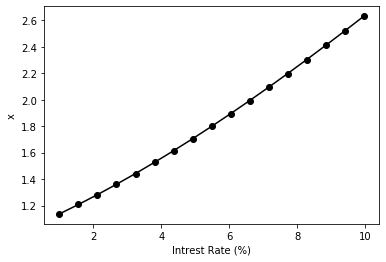

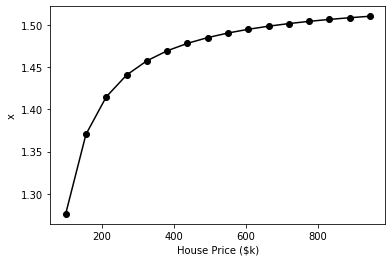

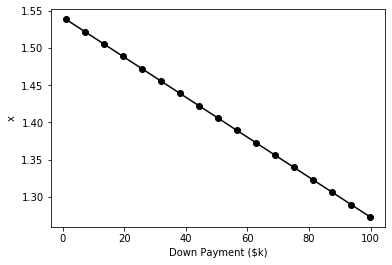

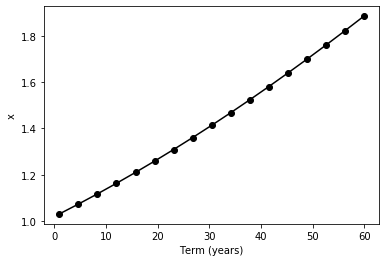

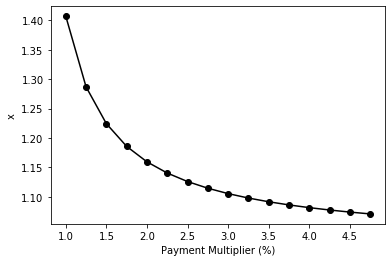

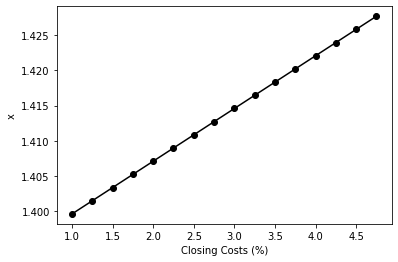

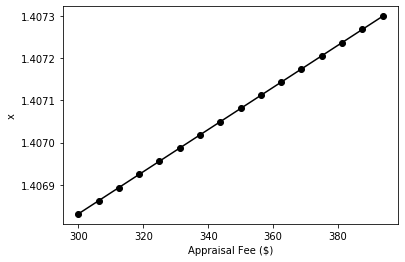

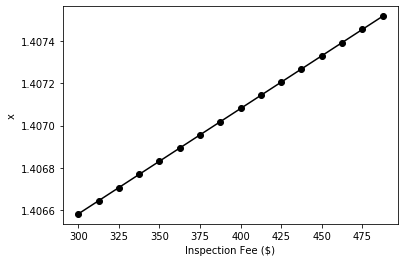

In [9]:
reload_graphs(None)
reload_graphs_button.on_click(reload_graphs)

## Options
This is an analysis that compairs two house options

In [10]:
housePrice = 500
intrestRate = 5
downPayment = housePrice * 0.20
term = 30
closingCostsPrct = 3 
appraisalFee = 300 
inspectionFee = 300

In [11]:
minPaymentMuliplyer = 1
x, totalmonths, minPayment, payment = calculateX(intrestRate, housePrice, downPayment, term, minPaymentMuliplyer,closingCostsPrct, appraisalFee, inspectionFee)
option1 = x

minPaymentMuliplyer = 2
x, totalmonths, minPayment, payment = calculateX(intrestRate, housePrice, downPayment, term, minPaymentMuliplyer,closingCostsPrct, appraisalFee, inspectionFee)
option2 = x

expensesdiff = option1*housePrice - option2*housePrice
print('If a house costs $'+str(housePrice)+'k')
print('Option 1 x = '+str(round(option1,2)))
print('Option 2 x = '+str(round(option2,2)))
print('Option 2 is $'+str(round(expensesdiff,2))+'k more than Option 1')

If a house costs $500k
Option 1 x = 1.77
Option 2 x = 1.24
Option 2 is $265.73k more than Option 1


## Known end term analysis
This is an analysis of total expensis assuming you know how long you will have live in your house.

In [12]:
#home insurance, monthly HOA and property tax, private mortgage insurance, utilities, school

## Adjusted rate analysis
This is an analysis like the fixed rate analyis